<a href="https://colab.research.google.com/github/jesseomedina/IEORFinalProj/blob/main/FinalAppendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Imports

In [117]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Logistic Regression model
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # Do not confuse with DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# MAKE PREDICTIONS - Linear Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Random Forest
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#boosting
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold


#importing data using google drive
import numpy as np
from google.colab import drive

#linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [118]:
#connecting to google drive

drive.mount('/content/drive')
new_path = '/content/drive/My Drive/IEORPROJ'
os.chdir(new_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Logistic Regression


Loading diabetes dataset to use for the logistic regression model

In [83]:
#loading data and data cleaning
diabetes_data_set = pd.read_csv("DatasetOfDiabetes.csv")
diabetes_data_set['CLASS'] = diabetes_data_set ['CLASS'].str.strip()
diabetes_data_set['Gender'] = diabetes_data_set['Gender'].str.strip().str.upper()
diabetes_data_set['Gender'] = diabetes_data_set['Gender'].map({'M': 1, 'F': 0})


#splitting the data to ensure that all testing is done on the same dataset

diabetes_train, diabetes_test = train_test_split(diabetes_data_set, test_size=0.3, random_state=88)

Pairplot: plotting the quantitative variables against each other to see if there is a relationship

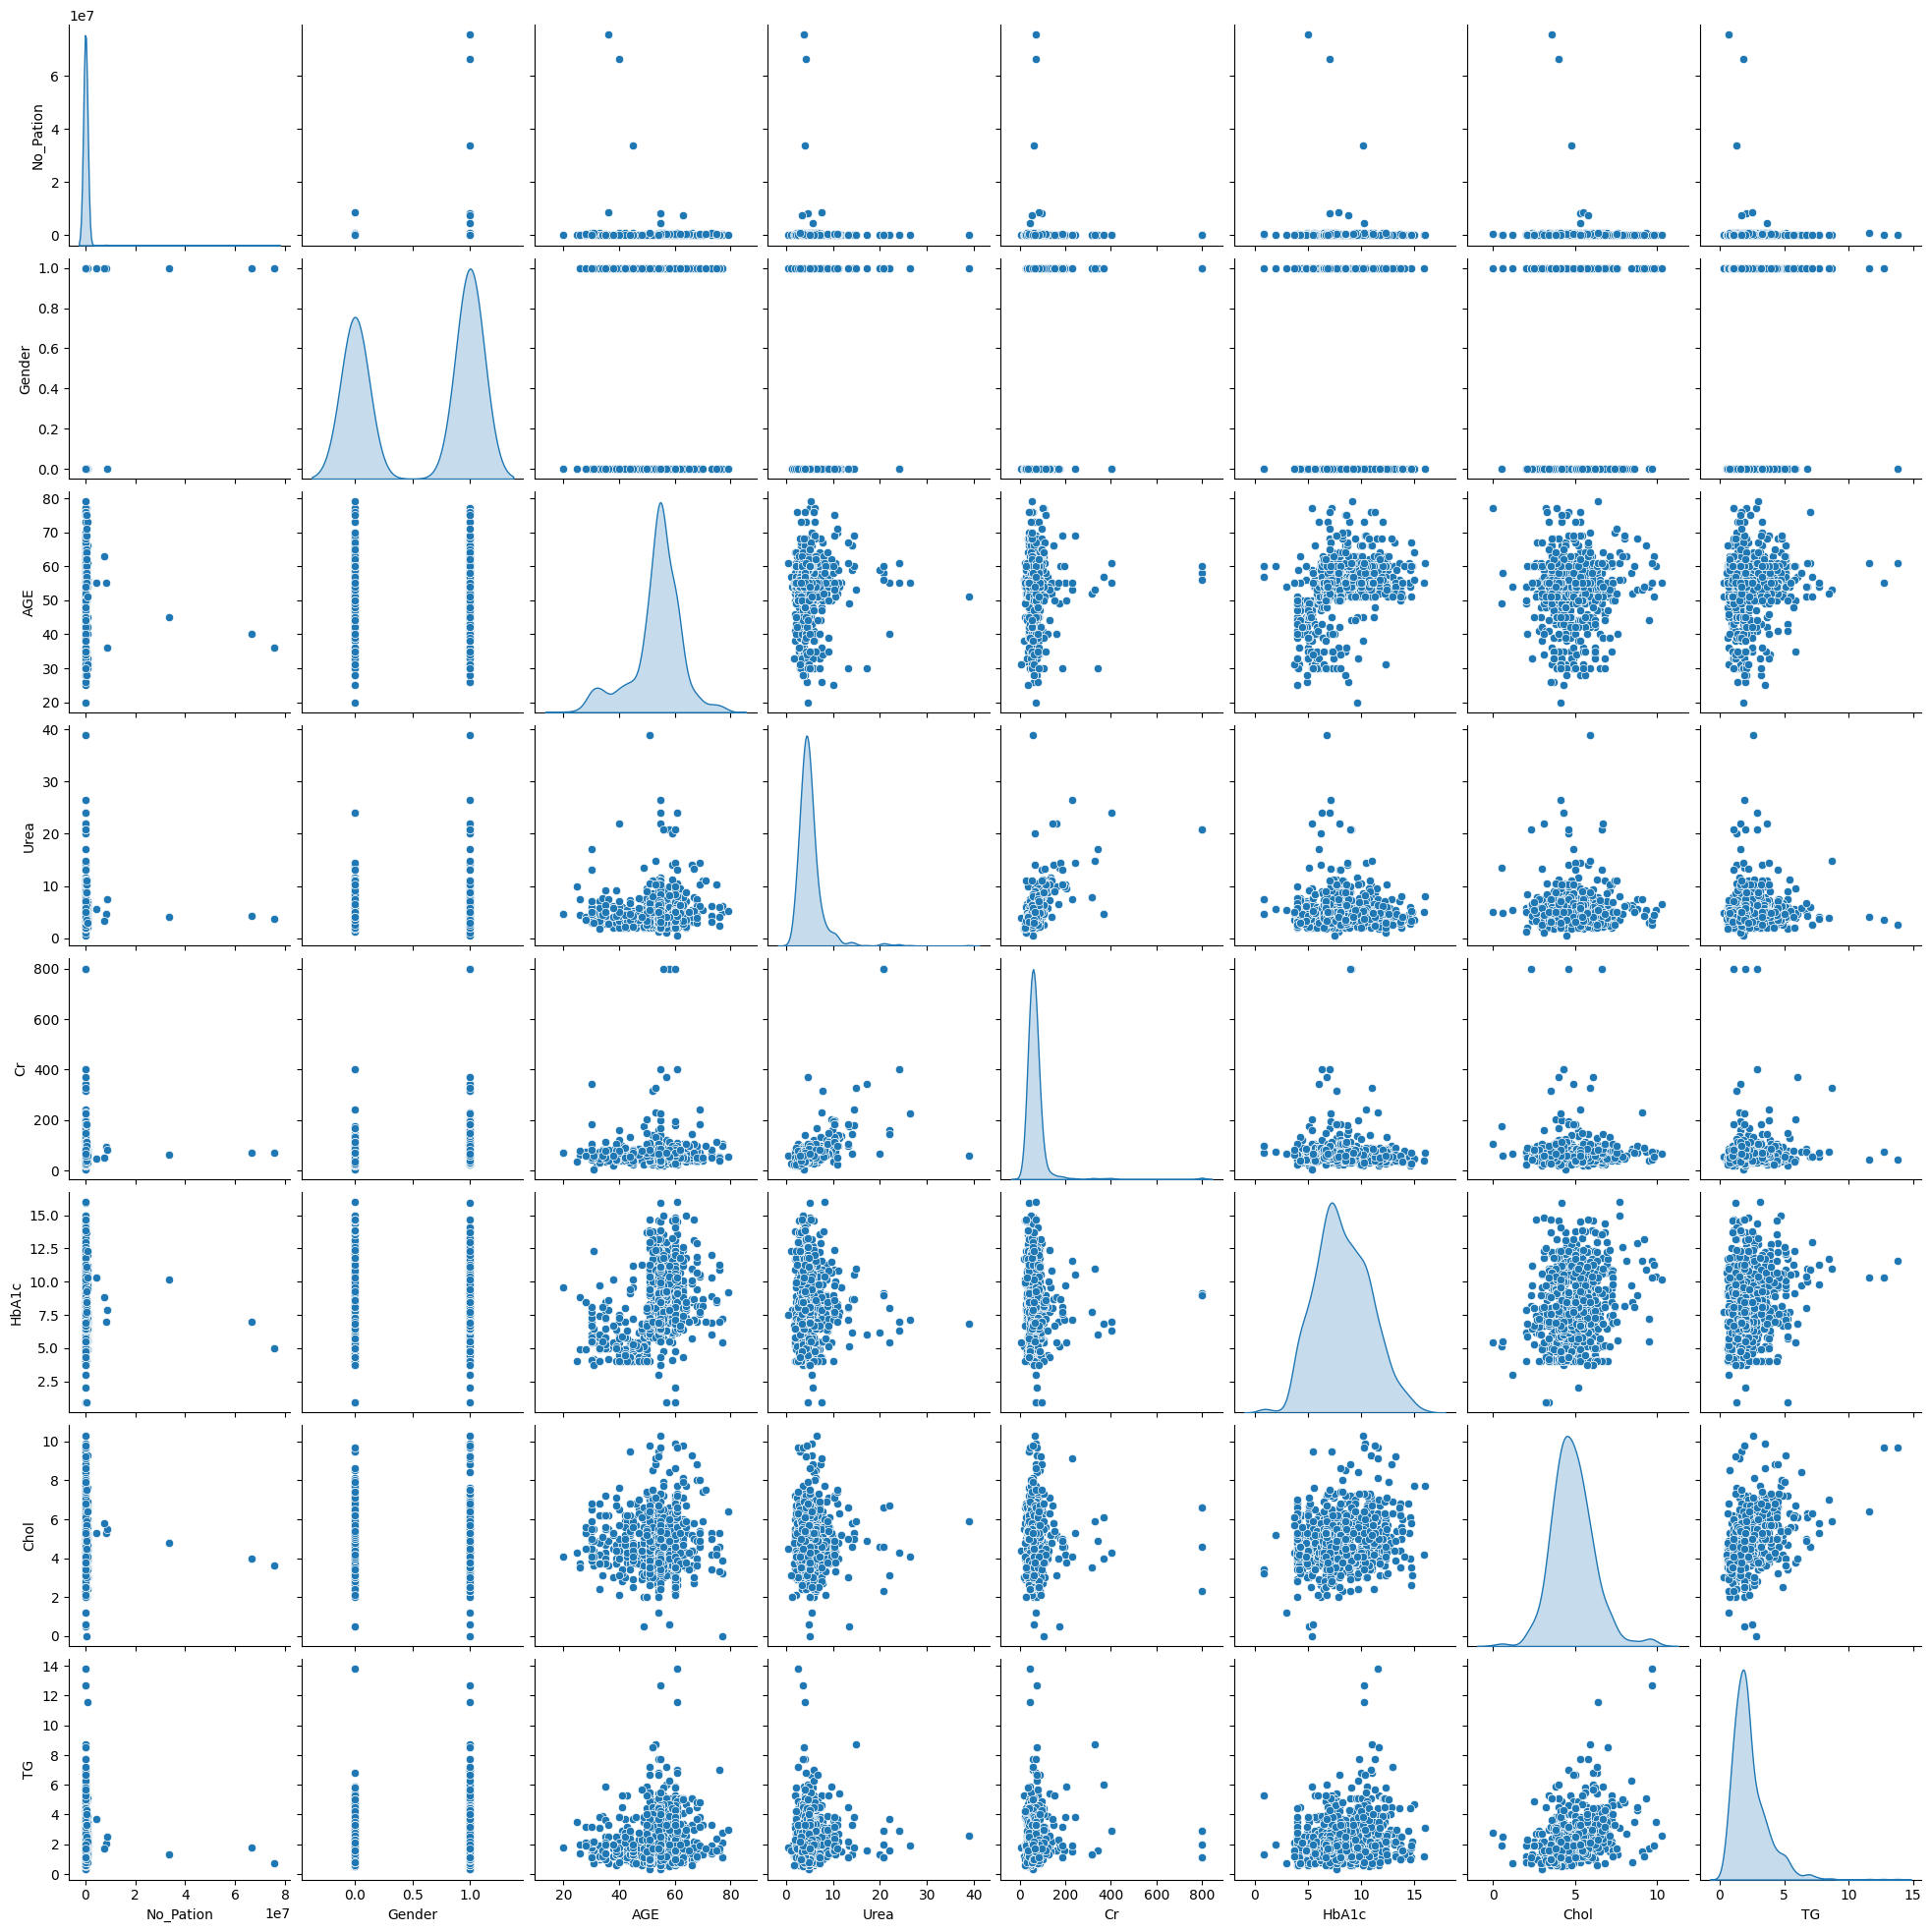

In [84]:
sns.pairplot(diabetes_data_set.iloc[:,1:9],diag_kind='kde')

Here, we clean up the data by renaming the columns so that they are legible to read in the dataframe, as well as assigning numeric values to the diabetic class for logistic regression

In [85]:
#data cleaning and mapping class variable for logistic regression

dia_train = diabetes_train.copy()
diabetes_data_train = dia_train.rename(columns = {'No_Pation': 'Patient_number', 'AGE': 'Age', 'Cr': 'Creatinine_ratio', 'Chol': 'Cholesterol', 'TG': 'Triglycerides'})
diabetes_data_train['Diabetic'] = diabetes_data_train['CLASS'].map({'Y': 1.0, 'N': 0.0, 'P' : 0.5})
diabetes_data_train['log_creatine'] = np.log(diabetes_data_train['Creatinine_ratio'])
diabetes_data_train['log_age'] = np.log(diabetes_data_train['Age'])

dia_test = diabetes_test.copy()
diabetes_data_test = dia_test.rename(columns = {'No_Pation': 'Patient_number', 'AGE': 'Age', 'Cr': 'Creatinine_ratio', 'Chol': 'Cholesterol', 'TG': 'Triglycerides'})
diabetes_data_test['Diabetic'] = diabetes_data_test['CLASS'].map({'Y': 1.0, 'N': 0.0, 'P' : 0.5})
diabetes_data_test['log_creatine'] = np.log(diabetes_data_test['Creatinine_ratio'])
diabetes_data_test['log_age'] = np.log(diabetes_data_test['Age'])

Create a histplot to visualize the count of the diabetic

In [86]:
data_set = diabetes_data_set.copy()
data_set = data_set.rename(columns = {'No_Pation': 'Patient_number', 'AGE': 'Age', 'Cr': 'Creatinine_ratio', 'Chol': 'Cholesterol', 'TG': 'Triglycerides'})
data_set['Diabetic'] = data_set['CLASS'].map({'Y': 1.0, 'N': 0.0, 'P' : 0.5})
data_set['log_creatine'] = np.log(data_set['Creatinine_ratio'])
data_set['log_age'] = np.log(data_set['Age'])


<Axes: xlabel='Diabetic', ylabel='Count'>

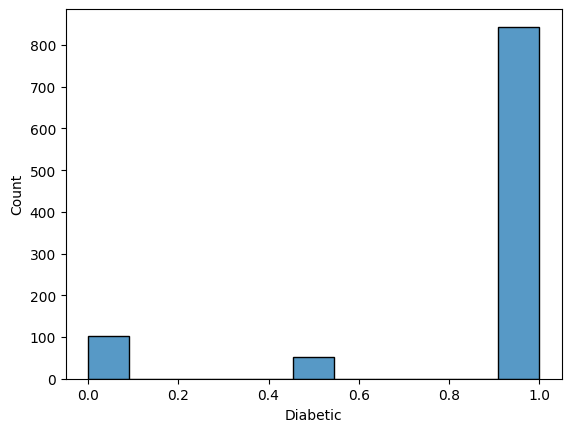

In [87]:
sns.histplot(data=data_set, x='Diabetic')

In [88]:
#seeing count of each variable

diabetic_yes = data_set[data_set['CLASS'] == 'Y']
diabetic_pre = data_set[data_set['CLASS'] == 'P']
diabetic_no = data_set[data_set['CLASS'] == 'N']
print(len(diabetic_yes), len(diabetic_pre), len(diabetic_no))

844 53 103


In [89]:


# diabetic train dataset
diabetic_train = diabetes_data_train
# diabetic test dataset
diabetic_test = diabetes_data_test
print("Training set: " + str(len(diabetic_train)) + "       Testing set: " + str(len(diabetic_test)))

Training set: 700       Testing set: 300


In [90]:
#Logistic Regression


logreg = smf.logit(formula = 'Diabetic ~ log_age + Urea + log_creatine + HbA1c + Cholesterol + Triglycerides + HDL + LDL + VLDL + BMI',
                       data = diabetic_train.drop(columns = ['CLASS'])).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.087813
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Diabetic   No. Observations:                  700
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                           10
Date:                Sat, 14 Dec 2024   Pseudo R-squ.:                  0.7628
Time:                        06:17:49   Log-Likelihood:                -61.469
converged:                       True   LL-Null:                       -259.11
Covariance Type:            nonrobust   LLR p-value:                 9.522e-79
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -28.4911      5.702     -4.997      0.000     -39.666     -17.316
log_age           0

In [91]:
# Results

p_hat = 0.5
y_probT = logreg.predict(diabetic_test)
y_test = diabetic_test["Diabetic"]
y_predT = pd.Series([1 if p > p_hat else 0 for p in y_probT], index=y_probT.index)
diabetic_test["predicted_prob"] = y_probT
diabetic_test["prediction"] = diabetic_test["predicted_prob"].apply(lambda x: 1 if (x > 0.666) else 0 if (x < 0.333) else 0.5)
diabetic_test

,ID,Patient_number,Gender,Age,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL,LDL,VLDL,BMI,CLASS,Diabetic,log_creatine,log_age,predicted_prob,prediction
5,634,34224,0,45,2.300,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N,0.0,3.178054,3.806662,0.005200,0.0
959,142,45375,0,35,9.100,114,7.2,5.6,1.4,1.4,3.6,0.6,20.0,Y,1.0,4.736198,3.555348,0.639368,0.5
564,559,34439,0,58,3.000,50,11.9,4.4,1.6,1.0,4.1,1.0,27.0,Y,1.0,3.912023,4.060443,0.999833,1.0
528,493,34419,0,51,4.100,78,7.2,7.2,5.3,1.0,3.8,2.4,38.0,Y,1.0,4.356709,3.931826,0.999999,1.0
270,614,34323,0,52,6.000,76,6.5,2.7,1.2,0.8,1.4,0.5,31.0,Y,1.0,4.330733,3.951244,0.974629,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,778,34343,0,51,3.400,31,7.0,4.5,0.6,1.1,3.1,0.3,39.0,Y,1.0,3.433987,3.931826,0.999901,1.0
850,5,51477,1,58,5.900,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y,1.0,4.204693,4.060443,0.999786,1.0
636,610,85653,1,55,6.833,64,6.7,4.8,2.8,0.9,2.7,19.5,27.0,Y,1.0,4.158883,4.007333,0.999820,1.0
370,377,24097,0,68,5.700,71,7.0,5.0,1.7,0.8,3.5,0.8,36.6,Y,1.0,4.262680,4.219508,0.999918,1.0


<Axes: xlabel='prediction', ylabel='Count'>

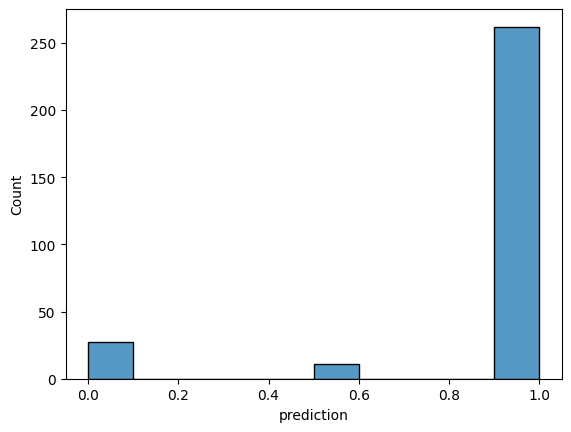

In [92]:
sns.histplot(diabetic_test["prediction"])

In [93]:
diabetic_test["difference"] = diabetic_test["prediction"] - diabetic_test["Diabetic"]
diabetic_test

,ID,Patient_number,Gender,Age,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL,LDL,VLDL,BMI,CLASS,Diabetic,log_creatine,log_age,predicted_prob,prediction,difference
5,634,34224,0,45,2.300,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N,0.0,3.178054,3.806662,0.005200,0.0,0.0
959,142,45375,0,35,9.100,114,7.2,5.6,1.4,1.4,3.6,0.6,20.0,Y,1.0,4.736198,3.555348,0.639368,0.5,-0.5
564,559,34439,0,58,3.000,50,11.9,4.4,1.6,1.0,4.1,1.0,27.0,Y,1.0,3.912023,4.060443,0.999833,1.0,0.0
528,493,34419,0,51,4.100,78,7.2,7.2,5.3,1.0,3.8,2.4,38.0,Y,1.0,4.356709,3.931826,0.999999,1.0,0.0
270,614,34323,0,52,6.000,76,6.5,2.7,1.2,0.8,1.4,0.5,31.0,Y,1.0,4.330733,3.951244,0.974629,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,778,34343,0,51,3.400,31,7.0,4.5,0.6,1.1,3.1,0.3,39.0,Y,1.0,3.433987,3.931826,0.999901,1.0,0.0
850,5,51477,1,58,5.900,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y,1.0,4.204693,4.060443,0.999786,1.0,0.0
636,610,85653,1,55,6.833,64,6.7,4.8,2.8,0.9,2.7,19.5,27.0,Y,1.0,4.158883,4.007333,0.999820,1.0,0.0
370,377,24097,0,68,5.700,71,7.0,5.0,1.7,0.8,3.5,0.8,36.6,Y,1.0,4.262680,4.219508,0.999918,1.0,0.0


     index  difference
0      178        -1.0
1      209        -1.0
2      203        -1.0
3      219        -1.0
4      187        -1.0
..     ...         ...
295    105         0.5
296     93         0.5
297     78         1.0
298     48         1.0
299     70         1.0

[300 rows x 2 columns]
Accuracy =  0.9
Accuracy of TP =  0.9725490196078431
Accuracy of TPre =  0.17647058823529413
Accuracy of TN =  0.6785714285714286


<Axes: ylabel='difference'>

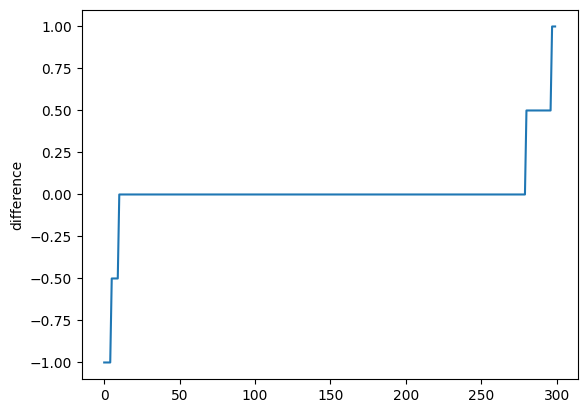

In [94]:
data_diff = diabetic_test["difference"].sort_values(ascending = True).reset_index()
print(data_diff)
print("Accuracy = ", (np.count_nonzero(diabetic_test["difference"] == 0) / len(data_diff)))
print("Accuracy of TP = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 1) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 1))))
print("Accuracy of TPre = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 0.5) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 0.5))))
print("Accuracy of TN = ", ((np.count_nonzero((diabetic_test["Diabetic"] == 0) & (diabetic_test["difference"] == 0)) / np.count_nonzero(diabetic_test["Diabetic"] == 0))))
sns.lineplot(data_diff['difference'])

# Random Forest and Boosting

Removing Gender and any pre-diabetic from the training and test set. properly labeling the data for Random Forest and Boosting

In [95]:
diabetes_RF_train = diabetes_train.copy()
diabetes_RF_train = diabetes_RF_train.drop('Gender', axis=1)
df2 = diabetes_RF_train[~diabetes_RF_train['CLASS'].isin(['P'])]
X_train = df2.drop('CLASS', axis=1)  # Features
y_train = df2['CLASS']  # Target variable

diabetes_RF_test = diabetes_test.copy()
diabetes_RF_test = diabetes_RF_test.drop('Gender', axis=1)
df_test = diabetes_RF_test[~diabetes_RF_test['CLASS'].isin(['P'])]
X_test = df_test.drop('CLASS', axis=1)  # Features
y_test = df_test['CLASS']  # Target variable

Define Accuracy Function and Perform 5 Fold Cross validation for Random Forest Model

In [96]:
# Define a custom function to calculate Accuracy from confusion matrix values
def accuracy(tn, fp, fn, tp):
    return (tn + tp)/(tn+fp+fn+tp)

# Define hyperparameter grid for Random Forest model
grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [2024]}
rf = RandomForestClassifier()

# Define K-Fold cross-validation object with 5 folds, random shuffling, and fixed random seed
cv = KFold(n_splits=5,random_state=2024,shuffle=True)
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=1)

# Perform hyperparameter tuning and training of Random Forest model on training data
rf_cv.fit(X_train, y_train)

# Initialize Random Forest classifier with optimal hyperparameters obtained from GridSearchCV
rf_optimal = RandomForestClassifier(max_features= rf_cv.best_params_['max_features'], min_samples_leaf=5,
                                    n_estimators=500, random_state=2024)

# Train Random Forest model with optimal hyperparameters on training data
rf_optimal_model = rf_optimal.fit(X_train, y_train)
# Make predictions on test data using trained Random Forest model
y_pred_rf_optimal = rf_optimal_model.predict(X_test)

#Create Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_optimal)

#Calculate accuracy of Random Forest model using custom accuracy function
model_rf_acc = accuracy(cm_rf.item((0,0)), cm_rf.item((0,1)), cm_rf.item((1, 0)), cm_rf.item((1, 1)))
#Display the Best Parameters
print(f"Best Parameters: {rf_cv.best_params_}")
#Display Accuracy of Random Forest model
print(f'CV Random Forest Test Accuracy: {model_rf_acc:.4f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 2024}
CV Random Forest Test Accuracy: 0.9788


Boosting

We implemented a data preprocessing workflow to prepare the dataset for our Gradient Boosting Classifier. First, we mapped categorical variables the target variable (class, where 'Y' becomes 1 and 'N' becomes 0). To ensure all features contribute equally during training, we normalized the numerical features (e.g., age, urea, chol) using StandardScaler. We then dropped any na values for class deleting pre-diabetics from our rows. This preprocessing pipeline guarantees that the data is clean, standardized, and ready for effective model training and evaluation.

In [97]:
diabetes_train_b = diabetes_train.copy()
diabetes_train_b['CLASS'] = diabetes_train_b['CLASS'].map({'Y': 1, 'N': 0})
#normalize/Standardize numeric features (except target and ID columns)
features_to_scale = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
scaler = StandardScaler()
diabetes_train_b[features_to_scale] = scaler.fit_transform(diabetes_train_b[features_to_scale])

#ensure we only delete Pre-diabetics from our table
diabetes_train_b = diabetes_train_b.dropna(subset=["CLASS"])
y_train = diabetes_train_b["CLASS"]
X_train = diabetes_train_b.drop(columns=["ID", "No_Pation", "CLASS"])

#now on test data
diabetes_test_b = diabetes_test.copy()
diabetes_test_b['CLASS'] = diabetes_test_b['CLASS'].map({'Y': 1, 'N': 0})
features_to_scale = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
diabetes_test_b[features_to_scale] = scaler.fit_transform(diabetes_test_b[features_to_scale])
diabetes_test_b = diabetes_test_b.dropna(subset=["CLASS"])
y_test = diabetes_test_b["CLASS"]
X_test = diabetes_test_b.drop(columns=["ID", "No_Pation", "CLASS"])

Check class distribution

In [98]:
#check class distribution

print("Class distribution in y_train:")
print(y_train.value_counts())
X_train_cleaned = X_train.dropna()
X_test_cleaned = X_test.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]
y_test_cleaned = y_test.loc[X_test_cleaned.index]

Class distribution in y_train:
CLASS
1.0    589
0.0     75
Name: count, dtype: int64


gradient Boosting Classifier

In [99]:
#gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_cleaned, y_train_cleaned)
y_pred_train = gb_clf.predict(X_train_cleaned)
y_pred_test = gb_clf.predict(X_test_cleaned)

testing accuracy prior to hyperperameter tuning

In [100]:
#testing accuracy

train_accuracy = accuracy_score(y_train_cleaned, y_pred_train)
test_accuracy = accuracy_score(y_test_cleaned, y_pred_test)
y_pred_proba_test = gb_clf.predict_proba(X_test_cleaned)[:, 1]
test_auc = roc_auc_score(y_test_cleaned, y_pred_proba_test)
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.0000
Test Accuracy: 0.9894
Test AUC: 0.9987
Confusion Matrix:
[[ 26   2]
 [  1 254]]


hyperparameter Tuning with GridSearchCV to optimize the hyperparameters of a Gradient Boosting Classifier by systematically searching through a grid of possible values. The parameter grid includes variations in learning_rate (controls the contribution of each tree), n_estimators (number of trees), and max_depth (complexity of each tree). For each combination, the model is evaluated using 5-fold cross-validation, ensuring robust performance on unseen data. The optimization criterion is the ROC AUC score, which measures the model's ability to distinguish between classes. By automating the search process, GridSearchCV identifies the best-performing hyperparameter configuration, ensuring the model achieves a strong balance between accuracy and generalization. For this project, the best configuration achieved a nearly perfect ROC AUC score, indicating exceptional classification capability.



In [101]:
#hyperparameter Tuning with GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_cleaned, y_train_cleaned)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best ROC AUC Score: 0.9991


calculating test metrics and printing out their scores!

In [102]:
best_gb_clf = grid_search.best_estimator_
y_pred_test = best_gb_clf.predict(X_test_cleaned)
y_pred_proba_test = best_gb_clf.predict_proba(X_test_cleaned)[:, 1]

test_accuracy = accuracy_score(y_test_cleaned, y_pred_test)
test_auc = roc_auc_score(y_test_cleaned, y_pred_proba_test)
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.9894
Test AUC: 0.9993
Confusion Matrix:
[[ 27   1]
 [  2 253]]


# Linear Regression

In [103]:
#splitting the train and test data

DoD_train = diabetes_train.copy()
DoD_test = diabetes_test.copy()

In [104]:
#Linear regression All variables to predict blood sugar level

ols = smf.ols(formula="""HbA1c ~ AGE + Urea + Chol + TG + HDL + LDL + VLDL + BMI + Gender""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     30.36
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           8.79e-45
Time:                        06:20:15   Log-Likelihood:                -1529.8
No. Observations:                 700   AIC:                             3080.
Df Residuals:                     690   BIC:                             3125.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1856      0.694     -1.708      0.0

In [105]:
#checking for colinearity


# Create a DataFrame with the predictors
X = DoD_train[['AGE', 'Urea', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender']]

# Add a constant term for the VIF calculation
X_with_const = pd.concat([pd.Series(1, index=X.index, name='Intercept'), X], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif_data)

    Variable        VIF
0  Intercept  71.736077
1        AGE   1.262026
2       Urea   1.023248
3       Chol   1.550978
4         TG   1.256572
5        HDL   1.162428
6        LDL   1.351030
7       VLDL   1.161529
8        BMI   1.316495
9     Gender   1.089113


In [106]:
#trying different variable selection based on highed colinearity variables

ols = smf.ols(formula="""HbA1c ~ Urea + Chol + TG + HDL + LDL + VLDL""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           8.94e-11
Time:                        06:20:18   Log-Likelihood:                -1617.1
No. Observations:                 700   AIC:                             3248.
Df Residuals:                     693   BIC:                             3280.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4238      0.458     14.027      0.0

In [107]:
#removing variables based on high p-values (HDL, VLDL)
ols = smf.ols(formula="""HbA1c ~ AGE + Urea + Chol + TG + LDL + BMI + Gender""",
              data=DoD_train)
model1 = ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.75
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           5.90e-46
Time:                        06:20:19   Log-Likelihood:                -1530.8
No. Observations:                 700   AIC:                             3078.
Df Residuals:                     692   BIC:                             3114.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3564      0.675     -2.010      0.0

In [108]:
#testing

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
X_test = DoD_test[['AGE', 'Urea', 'Chol', 'TG', 'LDL', 'BMI', 'Gender']]
y_test = DoD_test['HbA1c']
y_pred = model1.predict(sm.add_constant(X_test))

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual HbA1c': y_test,
    'Predicted HbA1c': y_pred
})

# Display the first few rows of the DataFrame
print(results)

Mean Absolute Error (MAE): 1.6592785155856613
Root Mean Squared Error (RMSE): 2.1865740746850486
     Actual HbA1c  Predicted HbA1c
5             4.0         5.780097
959           7.2         5.217514
564          11.9         7.824471
528           7.2        10.617357
270           6.5         7.642869
..            ...              ...
338           7.0         9.213828
850           9.9         8.138513
636           6.7         7.742763
370           7.0        10.159235
737          10.1         9.073920

[300 rows x 2 columns]


In [109]:
# Calculate R-squared on the test data

r2 = r2_score(y_test, y_pred)

print("R-squared (R²):", r2)

R-squared (R²): 0.2344399905295239


Linear Regression is giving poor results! The goal was to see coorelation in factors such as blood glucose levels in predicting Diabetes. In order to use Machine Learning to help us identify useful trends in predicting diabetes we will switch gears and now focus on a different approach that could provide valuable insight on which factors contribute to Diabetes. We will now use clustering. Clustering allows us to see trends in our data by grouping them without focusing on labels, allowing us to see underlying patterns in our data. By comparing these clusters with the amount of members who do/dont have diaebtes we can effecially see which trends could potentially
 impact diabetes health. This will help us see what trends in behavior could contirbute to diabetes

# Clustering

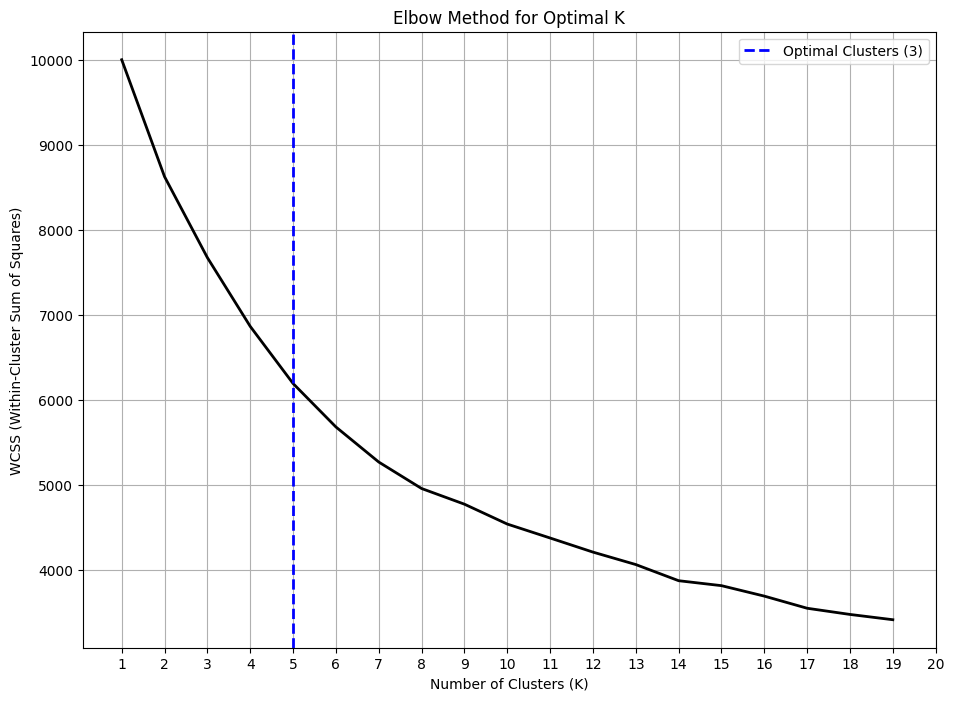

In [110]:
#restarting dataset, performing data cleaning, and finding optimal K


data = diabetes_data_set.copy()
# Drop the Gender, ID, and No_Pation columns
data_cleaned_no_gender = data.drop(columns=['ID','No_Pation','Gender'])

# Standardize the features for clustering
scaler = StandardScaler()
data_scaled_no_gender = scaler.fit_transform(data_cleaned_no_gender.drop(columns=['CLASS']))


# Elbow Method to determine the optimal number of clusters
wcss = []
for k in range(1, 20):  # Test for clusters between 1 and 20
    kmeans_elbow = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans_elbow.fit(data_scaled_no_gender)
    wcss.append(kmeans_elbow.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(11, 8))
plt.plot(range(1, 20), wcss, linewidth=2, color='black')
plt.axvline(x=5, linewidth=2, linestyle="--", color="blue", label="Optimal Clusters (3)")
plt.xticks(range(1, 21))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid(axis='both')
plt.show()

In [111]:
#clustering with optimal K

# Perform KMeans clustering with 3 clusters
kmeans_no_gender = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=100, random_state=88)
data['KMeans_Cluster_No_Gender'] = kmeans_no_gender.fit_predict(data_scaled_no_gender)


# Compare the number of diabetics in each cluster without Gender
cluster_diabetic_count_no_gender = data.groupby('KMeans_Cluster_No_Gender')['CLASS'].value_counts()
cluster_diabetic_count_no_gender

KMeans_Cluster_No_Gender  CLASS
0                         Y        745
                          N          2
                          P          1
1                         N        100
                          Y         88
                          P         51
2                         Y         11
                          N          1
                          P          1
Name: count, dtype: int64

In [112]:
#Analyze the results

# Select only numeric columns for analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate mean values for each cluster
cluster_means = data.groupby('KMeans_Cluster_No_Gender')[numeric_columns].mean()

# Display the results
print(cluster_means)

                                  ID      No_Pation    Gender        AGE  \
KMeans_Cluster_No_Gender                                                   
0                         341.504011  224194.136364  0.589572  56.997326   
1                         347.523013  428841.020921  0.476987  42.682008   
2                         153.615385   27783.846154  0.769231  53.307692   

                               Urea          Cr     HbA1c      Chol        TG  \
KMeans_Cluster_No_Gender                                                        
0                          5.019977   64.745989  9.168262  4.901364  2.475013   
1                          4.490795   62.129707  5.533473  4.740586  1.927197   
2                         22.807692  435.692308  7.753846  4.892308  2.900000   

                               HDL       LDL      VLDL        BMI  \
KMeans_Cluster_No_Gender                                            
0                         1.203209  2.573449  2.023529  31.463610   
1     

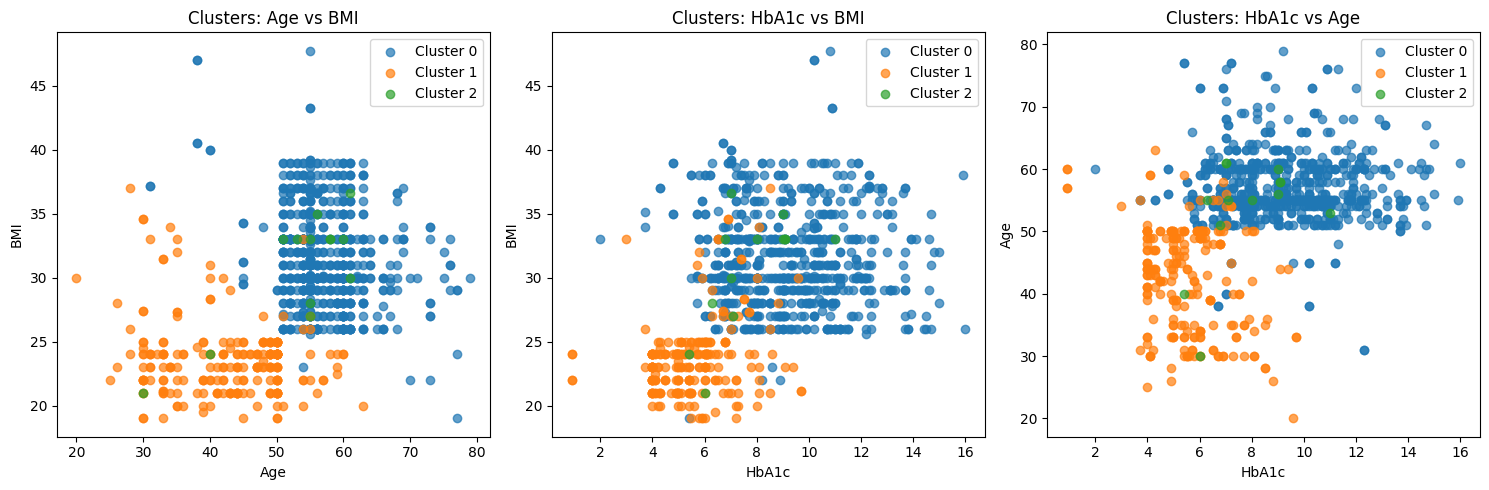

In [113]:
cluster_labels = data['KMeans_Cluster_No_Gender']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Age vs BMI
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[0].scatter(cluster_data['AGE'], cluster_data['BMI'], label=f'Cluster {cluster}', alpha=0.7)
axes[0].set_title("Clusters: Age vs BMI")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("BMI")
axes[0].legend()

# Plot 2: HbA1c vs BMI
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[1].scatter(cluster_data['HbA1c'], cluster_data['BMI'], label=f'Cluster {cluster}', alpha=0.7)
axes[1].set_title("Clusters: HbA1c vs BMI")
axes[1].set_xlabel("HbA1c")
axes[1].set_ylabel("BMI")
axes[1].legend()

# Plot 3: HbA1c vs Age
for cluster in range(3):
    cluster_data = data[cluster_labels == cluster]
    axes[2].scatter(cluster_data['HbA1c'], cluster_data['AGE'], label=f'Cluster {cluster}', alpha=0.7)
axes[2].set_title("Clusters: HbA1c vs Age")
axes[2].set_xlabel("HbA1c")
axes[2].set_ylabel("Age")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [120]:
from google.colab import drive

os.getcwd()
os.chdir('/content/drive/My Drive/IEORPROJ')
!jupyter nbconvert FinalAppendix.ipynb --to html

[NbConvertApp] Converting notebook FinalAppendix.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1477705 bytes to FinalAppendix.html
